In [1]:
import pandas as pd
import numpy as np
import os
import math
import graphlab
import graphlab as gl
import graphlab.aggregate as agg

In [2]:
'''钢炮'''
path = '/home/zongyi/bimbo_data/'

In [17]:
train = gl.SFrame.read_csv(path + 'train_lag5_w8.csv', verbose=False)

In [10]:
del train['id']
del train['Venta_uni_hoy']
del train['Venta_hoy']
del train['Dev_uni_proxima']
del train['Dev_proxima']
del train['Demanda_uni_equil']

In [11]:
del train['prior_sum']
del train['lag_sum']
del train['week_times']
del train['Semana']

In [5]:
# town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
# train = train.join(town, on=['Agencia_ID','Producto_ID'], how='left')
# train = train.fillna('t_c',1)
# train = train.fillna('tcc',0)
# train = train.fillna('tp_sum',0)
# del train['Town']

In [7]:
# relag_train = gl.SFrame.read_csv(path + 're_lag_train.csv', verbose=False)
# train = train.join(relag_train, on=['Cliente_ID','Producto_ID','Semana'], how='left')
# train = train.fillna('re_lag1',0)
# train = train.fillna('re_lag2',0)
# train = train.fillna('re_lag3',0)
# train = train.fillna('re_lag4',0)
# train = train.fillna('re_lag5',0)
# del relag_train

In [8]:
# pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
# train = train.join(pd, on=['Producto_ID'], how='left')
# train = train.fillna('prom',0)
# train = train.fillna('weight',0)
# train = train.fillna('pieces',1)
# train = train.fillna('w_per_piece',0)
# train = train.fillna('healthy',0)
# train = train.fillna('drink',0)
# del train['brand']
# del train['NombreProducto']
# del pd

In [9]:
# client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
# train = train.join(client, on=['Cliente_ID'], how='left')
# del client

In [42]:
# Make a train-test split
# train_data, test_data = train.random_split(0.999)

# Create a model.
model = gl.boosted_trees_regression.create(train, target='Demada_log',
                                           step_size=0.1,
                                           max_iterations=1000,
                                           max_depth = 10,
                                          metric='rmse',
                                          random_seed=643,
                                          column_subsample=0.7,
                                          row_subsample=0.85,
                                          validation_set=None,
                                          model_checkpoint_path=path,
                                          model_checkpoint_interval=1000)


Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10396472

Number of features          : 14

Number of unpacked features : 14

+-----------+--------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-rmse | Validation-rmse |

+-----------+--------------+---------------+-----------------+

| 1         | 27.201350    | 1.268903      | 1.267609        |

| 2         | 54.446795    | 1.165219      | 1.163619        |

| 3         | 79.189943    | 1.071897      | 1.070408        |

| 4         | 103.986517   | 0.989873      | 0.988515        |

| 5         | 128.143162   | 0.917530      | 0.916328        |

| 6         | 151.644742   | 0.854313      | 0.853378        |

| 7         | 176.966372   | 0.799365      | 0.798037        |

| 8         | 204.234475   | 0.752778      | 0.751562        |

| 9         | 227.578450   | 0.710774      | 0.709410        |

| 10        | 252.007971   | 0.674477      | 0.673100        |

| 11        | 276.554376   | 0.643727      | 0.642594        |

| 12        | 301.072763   | 0.617694      | 0.616710        |

| 13        | 327.477755   | 0.595479      | 0.594807        |

| 14        | 351.471539   | 0.576724      | 0.576236        |

| 15        | 375.506633   | 0.560239      | 0.559705        |

| 16        | 399.483642   | 0.546840      | 0.546356        |

| 17        | 423.100816   | 0.535349      | 0.534793        |

| 18        | 448.243984   | 0.524919      | 0.524324        |

| 19        | 473.620975   | 0.516211      | 0.515818        |

| 20        | 500.298011   | 0.509101      | 0.508666        |

| 21        | 524.411252   | 0.503044      | 0.502883        |

| 22        | 548.118604   | 0.498370      | 0.498518        |

| 23        | 572.915908   | 0.494643      | 0.495095        |

| 24        | 597.622946   | 0.491459      | 0.492098        |

| 25        | 623.105261   | 0.488354      | 0.489167        |

| 26        | 648.438849   | 0.485890      | 0.486738        |

| 27        | 673.341060   | 0.483967      | 0.484899        |

| 28        | 699.022241   | 0.482196      | 0.483131        |

| 29        | 722.983679   | 0.480465      | 0.481626        |

| 30        | 746.617241   | 0.479328      | 0.480555        |

| 31        | 772.051329   | 0.478185      | 0.479546        |

| 32        | 798.526036   | 0.476952      | 0.478395        |

| 33        | 822.896011   | 0.475789      | 0.477209        |

| 34        | 848.995470   | 0.474743      | 0.476281        |

| 35        | 874.759629   | 0.473522      | 0.475149        |

| 36        | 902.337785   | 0.472639      | 0.474203        |

| 37        | 927.279698   | 0.471733      | 0.473206        |

| 38        | 952.351612   | 0.471371      | 0.472918        |

| 39        | 978.739170   | 0.470689      | 0.472414        |

| 40        | 1003.232958  | 0.470056      | 0.471809        |

| 41        | 1028.181686  | 0.469644      | 0.471497        |

| 42        | 1054.763172  | 0.469100      | 0.470973        |

| 43        | 1077.996778  | 0.468624      | 0.470519        |

| 44        | 1105.114311  | 0.468019      | 0.469931        |

| 45        | 1130.122311  | 0.467381      | 0.469313        |

| 46        | 1156.124073  | 0.466990      | 0.468888        |

| 47        | 1182.005863  | 0.466533      | 0.468526        |

| 48        | 1208.777688  | 0.466344      | 0.468418        |

| 49        | 1234.589304  | 0.465855      | 0.467993        |

| 50        | 1261.373579  | 0.465403      | 0.467520        |

| 51        | 1285.588483  | 0.464837      | 0.467034        |

| 52        | 1309.594130  | 0.464707      | 0.466972        |

| 53        | 1333.950908  | 0.464200      | 0.466372        |

| 54        | 1359.798292  | 0.463836      | 0.466126        |

| 55        | 1385.004526  | 0.463569      | 0.465830        |

| 56        | 1410.964812  | 0.463211      | 0.465440        |

| 57        | 1436.833244  | 0.462941      | 0.465197        |

| 58        | 1463.321631  | 0.462648      | 0.464986        |

| 59        | 1486.518091  | 0.462530      | 0.464958        |

| 60        | 1512.532407  | 0.462247      | 0.464797        |

| 61        | 1539.303481  | 0.461922      | 0.464486        |

| 62        | 1564.386809  | 0.461749      | 0.464378        |

| 63        | 1589.335440  | 0.461338      | 0.464011        |

| 64        | 1615.425231  | 0.461064      | 0.463775        |

| 65        | 1642.114270  | 0.460766      | 0.463548        |

| 66        | 1667.511316  | 0.460542      | 0.463410        |

| 67        | 1692.188881  | 0.460374      | 0.463288        |

| 68        | 1716.283837  | 0.460249      | 0.463267        |

| 69        | 1743.986526  | 0.460091      | 0.463150        |

| 70        | 1769.130913  | 0.459909      | 0.462954        |

| 71        | 1794.982357  | 0.459629      | 0.462670        |

| 72        | 1819.883825  | 0.459355      | 0.462402        |

| 73        | 1846.793757  | 0.459118      | 0.462201        |

| 74        | 1871.262772  | 0.458908      | 0.462008        |

| 75        | 1895.674425  | 0.458760      | 0.461890        |

| 76        | 1920.774802  | 0.458585      | 0.461772        |

| 77        | 1945.423620  | 0.458479      | 0.461700        |

| 78        | 1971.241780  | 0.458328      | 0.461664        |

| 79        | 1997.876767  | 0.458173      | 0.461572        |

| 80        | 2022.773270  | 0.458063      | 0.461542        |

| 81        | 2047.816675  | 0.457871      | 0.461340        |

| 82        | 2072.210929  | 0.457681      | 0.461207        |

| 83        | 2097.469413  | 0.457586      | 0.461094        |

| 84        | 2122.718785  | 0.457455      | 0.460949        |

| 85        | 2147.169322  | 0.457323      | 0.460869        |

| 86        | 2173.474895  | 0.457127      | 0.460682        |

| 87        | 2200.639146  | 0.456950      | 0.460401        |

| 88        | 2225.843225  | 0.456828      | 0.460299        |

| 89        | 2252.402172  | 0.456592      | 0.460091        |

| 90        | 2278.321448  | 0.456505      | 0.460085        |

| 91        | 2302.215685  | 0.456385      | 0.460060        |

| 92        | 2328.323948  | 0.456261      | 0.459909        |

| 93        | 2355.885745  | 0.456146      | 0.459818        |

| 94        | 2382.470682  | 0.456029      | 0.459737        |

| 95        | 2409.474599  | 0.455927      | 0.459694        |

| 96        | 2434.430985  | 0.455801      | 0.459606        |

| 97        | 2458.367354  | 0.455723      | 0.459579        |

| 98        | 2482.986048  | 0.455624      | 0.459571        |

| 99        | 2509.087956  | 0.455555      | 0.459545        |

| 100       | 2535.916480  | 0.455452      | 0.459484        |

| 101       | 2562.343363  | 0.455252      | 0.459288        |

| 102       | 2586.873022  | 0.455174      | 0.459273        |

| 103       | 2612.843336  | 0.455053      | 0.459142        |

| 104       | 2637.762453  | 0.454971      | 0.459089        |

| 105       | 2663.926380  | 0.454846      | 0.459004        |

| 106       | 2688.505382  | 0.454763      | 0.458982        |

| 107       | 2712.241649  | 0.454719      | 0.458956        |

| 108       | 2738.354101  | 0.454612      | 0.458905        |

| 109       | 2765.052809  | 0.454423      | 0.458762        |

| 110       | 2789.443270  | 0.454333      | 0.458744        |

| 111       | 2814.156788  | 0.454225      | 0.458659        |

| 112       | 2840.072608  | 0.454108      | 0.458520        |

| 113       | 2865.892385  | 0.454019      | 0.458484        |

| 114       | 2890.452989  | 0.453941      | 0.458410        |

| 115       | 2914.560202  | 0.453849      | 0.458331        |

| 116       | 2940.218921  | 0.453752      | 0.458225        |

| 117       | 2964.075091  | 0.453657      | 0.458070        |

| 118       | 2987.905713  | 0.453586      | 0.458050        |

| 119       | 3012.221612  | 0.453488      | 0.457974        |

| 120       | 3037.422966  | 0.453419      | 0.457948        |

| 121       | 3060.751193  | 0.453336      | 0.457869        |

| 122       | 3084.537795  | 0.453210      | 0.457702        |

| 123       | 3110.064313  | 0.453166      | 0.457704        |

| 124       | 3133.408229  | 0.453097      | 0.457641        |

| 125       | 3158.283791  | 0.453003      | 0.457573        |

| 126       | 3184.197683  | 0.452872      | 0.457480        |

| 127       | 3208.405461  | 0.452785      | 0.457380        |

| 128       | 3233.814290  | 0.452698      | 0.457279        |

| 129       | 3258.418756  | 0.452642      | 0.457199        |

| 130       | 3284.126104  | 0.452536      | 0.457116        |

| 131       | 3309.356100  | 0.452473      | 0.457104        |

| 132       | 3334.354523  | 0.452341      | 0.456967        |

| 133       | 3359.448766  | 0.452295      | 0.456956        |

| 134       | 3385.091979  | 0.452236      | 0.456949        |

| 135       | 3409.219921  | 0.452182      | 0.456957        |

| 136       | 3433.503044  | 0.452076      | 0.456846        |

| 137       | 3457.859654  | 0.451957      | 0.456717        |

| 138       | 3483.431228  | 0.451889      | 0.456684        |

| 139       | 3508.699498  | 0.451800      | 0.456633        |

| 140       | 3533.061565  | 0.451738      | 0.456595        |

| 141       | 3558.353296  | 0.451678      | 0.456585        |

| 142       | 3583.080766  | 0.451581      | 0.456481        |

| 143       | 3606.638667  | 0.451488      | 0.456428        |

| 144       | 3630.370763  | 0.451427      | 0.456279        |

| 145       | 3655.488866  | 0.451375      | 0.456317        |

| 146       | 3681.122368  | 0.451305      | 0.456299        |

| 147       | 3705.519907  | 0.451226      | 0.456289        |

| 148       | 3731.818242  | 0.451173      | 0.456235        |

| 149       | 3756.943114  | 0.451079      | 0.456096        |

| 150       | 3782.680791  | 0.451020      | 0.456042        |

| 151       | 3809.288984  | 0.450975      | 0.456031        |

| 152       | 3833.468985  | 0.450892      | 0.456000        |

| 153       | 3858.245593  | 0.450805      | 0.455940        |

| 154       | 3884.695840  | 0.450747      | 0.455941        |

| 155       | 3909.652231  | 0.450619      | 0.455802        |

| 156       | 3936.607692  | 0.450536      | 0.455735        |

| 157       | 3959.984680  | 0.450445      | 0.455633        |

| 158       | 3985.417952  | 0.450382      | 0.455558        |

| 159       | 4011.857888  | 0.450288      | 0.455508        |

| 160       | 4037.713825  | 0.450227      | 0.455449        |

| 161       | 4063.743442  | 0.450156      | 0.455428        |

| 162       | 4088.573515  | 0.450097      | 0.455412        |

| 163       | 4114.940406  | 0.450030      | 0.455368        |

| 164       | 4139.489353  | 0.449940      | 0.455302        |

| 165       | 4165.033916  | 0.449843      | 0.455222        |

| 166       | 4190.987193  | 0.449792      | 0.455242        |

| 167       | 4217.812773  | 0.449723      | 0.455188        |

| 168       | 4243.798630  | 0.449673      | 0.455121        |

| 169       | 4267.417350  | 0.449624      | 0.455099        |

| 170       | 4293.687827  | 0.449567      | 0.455066        |

| 171       | 4320.366840  | 0.449433      | 0.454968        |

| 172       | 4344.836747  | 0.449392      | 0.454967        |

| 173       | 4370.001332  | 0.449347      | 0.454934        |

| 174       | 4395.510095  | 0.449285      | 0.454922        |

| 175       | 4421.579830  | 0.449238      | 0.454923        |

| 176       | 4449.180596  | 0.449132      | 0.454796        |

| 177       | 4475.190602  | 0.449068      | 0.454787        |

| 178       | 4500.077270  | 0.449020      | 0.454798        |

| 179       | 4527.154181  | 0.448963      | 0.454757        |

| 180       | 4551.820616  | 0.448906      | 0.454738        |

| 181       | 4577.446908  | 0.448803      | 0.454723        |

| 182       | 4602.359601  | 0.448747      | 0.454699        |

| 183       | 4628.190812  | 0.448662      | 0.454660        |

| 184       | 4654.389715  | 0.448592      | 0.454613        |

| 185       | 4678.504994  | 0.448480      | 0.454538        |

| 186       | 4704.075868  | 0.448423      | 0.454419        |

| 187       | 4729.289109  | 0.448372      | 0.454410        |

| 188       | 4754.248208  | 0.448311      | 0.454337        |

| 189       | 4779.305507  | 0.448263      | 0.454335        |

| 190       | 4803.769701  | 0.448213      | 0.454318        |

| 191       | 4829.627235  | 0.448147      | 0.454283        |

| 192       | 4854.779187  | 0.448095      | 0.454241        |

| 193       | 4881.430352  | 0.448041      | 0.454259        |

| 194       | 4908.138736  | 0.447993      | 0.454259        |

| 195       | 4933.659714  | 0.447969      | 0.454239        |

| 196       | 4959.697658  | 0.447912      | 0.454201        |

| 197       | 4983.777530  | 0.447839      | 0.454166        |

| 198       | 5009.520614  | 0.447803      | 0.454182        |

| 199       | 5034.646134  | 0.447734      | 0.454171        |

| 200       | 5060.980527  | 0.447683      | 0.454104        |

| 201       | 5084.966604  | 0.447631      | 0.454085        |

| 202       | 5109.242225  | 0.447556      | 0.454007        |

| 203       | 5133.638320  | 0.447498      | 0.454008        |

| 204       | 5158.402659  | 0.447455      | 0.453939        |

| 205       | 5183.319418  | 0.447412      | 0.453921        |

| 206       | 5207.660484  | 0.447351      | 0.453863        |

| 207       | 5231.988961  | 0.447243      | 0.453710        |

| 208       | 5258.049052  | 0.447209      | 0.453664        |

| 209       | 5284.703191  | 0.447176      | 0.453655        |

| 210       | 5309.934687  | 0.447140      | 0.453648        |

| 211       | 5333.988746  | 0.447101      | 0.453628        |

| 212       | 5357.824546  | 0.447056      | 0.453596        |

| 213       | 5383.232504  | 0.446997      | 0.453579        |

| 214       | 5407.601984  | 0.446949      | 0.453570        |

| 215       | 5433.227699  | 0.446930      | 0.453572        |

| 216       | 5458.790428  | 0.446875      | 0.453551        |

| 217       | 5482.213068  | 0.446844      | 0.453527        |

| 218       | 5505.591866  | 0.446791      | 0.453494        |

| 219       | 5530.641608  | 0.446759      | 0.453492        |

| 220       | 5557.973635  | 0.446741      | 0.453481        |

| 221       | 5582.251942  | 0.446698      | 0.453510        |

| 222       | 5607.612487  | 0.446644      | 0.453472        |

| 223       | 5633.497474  | 0.446612      | 0.453457        |

| 224       | 5657.130192  | 0.446527      | 0.453398        |

| 225       | 5684.344791  | 0.446481      | 0.453452        |

| 226       | 5709.261584  | 0.446426      | 0.453406        |

| 227       | 5734.440741  | 0.446387      | 0.453404        |

| 228       | 5761.679406  | 0.446319      | 0.453340        |

| 229       | 5786.319853  | 0.446263      | 0.453307        |

| 230       | 5810.958993  | 0.446211      | 0.453312        |

| 231       | 5835.513638  | 0.446167      | 0.453295        |

| 232       | 5860.701795  | 0.446148      | 0.453311        |

| 233       | 5885.983744  | 0.446080      | 0.453274        |

| 234       | 5910.939101  | 0.446029      | 0.453227        |

| 235       | 5935.704038  | 0.445962      | 0.453155        |

| 236       | 5962.043338  | 0.445894      | 0.453117        |

| 237       | 5987.203735  | 0.445853      | 0.453140        |

| 238       | 6012.541453  | 0.445832      | 0.453154        |

| 239       | 6036.480137  | 0.445773      | 0.453109        |

| 240       | 6062.531336  | 0.445727      | 0.453057        |

| 241       | 6088.211561  | 0.445697      | 0.453052        |

| 242       | 6113.506220  | 0.445663      | 0.453087        |

| 243       | 6137.481435  | 0.445617      | 0.453029        |

| 244       | 6162.692114  | 0.445589      | 0.453051        |

| 245       | 6187.623941  | 0.445559      | 0.453063        |

| 246       | 6213.099942  | 0.445511      | 0.453062        |

| 247       | 6238.882831  | 0.445477      | 0.453062        |

| 248       | 6263.820090  | 0.445422      | 0.453022        |

| 249       | 6290.047171  | 0.445391      | 0.453027        |

| 250       | 6313.650967  | 0.445369      | 0.453014        |

| 251       | 6338.551657  | 0.445315      | 0.452974        |

| 252       | 6362.760788  | 0.445285      | 0.452955        |

| 253       | 6386.772331  | 0.445240      | 0.452935        |

| 254       | 6411.690034  | 0.445198      | 0.452894        |

| 255       | 6435.684623  | 0.445157      | 0.452868        |

| 256       | 6459.883817  | 0.445097      | 0.452828        |

| 257       | 6486.917085  | 0.445054      | 0.452781        |

| 258       | 6511.549384  | 0.445014      | 0.452758        |

| 259       | 6534.960738  | 0.444991      | 0.452743        |

| 260       | 6559.804255  | 0.444951      | 0.452743        |

| 261       | 6584.889542  | 0.444904      | 0.452746        |

| 262       | 6609.855286  | 0.444867      | 0.452730        |

| 263       | 6635.587002  | 0.444820      | 0.452653        |

| 264       | 6659.537283  | 0.444764      | 0.452601        |

| 265       | 6683.736250  | 0.444732      | 0.452613        |

| 266       | 6707.338839  | 0.444694      | 0.452580        |

| 267       | 6732.976413  | 0.444642      | 0.452578        |

| 268       | 6756.806718  | 0.444609      | 0.452579        |

| 269       | 6782.247956  | 0.444571      | 0.452558        |

| 270       | 6806.422472  | 0.444544      | 0.452529        |

| 271       | 6831.561984  | 0.444482      | 0.452495        |

| 272       | 6856.969839  | 0.444445      | 0.452471        |

| 273       | 6881.524544  | 0.444417      | 0.452460        |

| 274       | 6903.800454  | 0.444411      | 0.452450        |

| 275       | 6928.016408  | 0.444384      | 0.452428        |

| 276       | 6952.218345  | 0.444372      | 0.452437        |

| 277       | 6975.470422  | 0.444329      | 0.452432        |

| 278       | 6998.879913  | 0.444287      | 0.452414        |

| 279       | 7023.946566  | 0.444248      | 0.452398        |

| 280       | 7047.240214  | 0.444206      | 0.452381        |

| 281       | 7072.534905  | 0.444178      | 0.452360        |

| 282       | 7096.333493  | 0.444153      | 0.452356        |

| 283       | 7121.044282  | 0.444132      | 0.452337        |

| 284       | 7144.017823  | 0.444094      | 0.452273        |

| 285       | 7168.705735  | 0.444062      | 0.452196        |

| 286       | 7193.069968  | 0.444011      | 0.452131        |

| 287       | 7217.843447  | 0.443952      | 0.452050        |

| 288       | 7241.955435  | 0.443907      | 0.452020        |

| 289       | 7267.102691  | 0.443880      | 0.452014        |

| 290       | 7291.963305  | 0.443838      | 0.451969        |

| 291       | 7317.443925  | 0.443810      | 0.451956        |

| 292       | 7340.523787  | 0.443779      | 0.451961        |

| 293       | 7367.005782  | 0.443728      | 0.451939        |

| 294       | 7391.783851  | 0.443685      | 0.451921        |

| 295       | 7415.947463  | 0.443656      | 0.451921        |

| 296       | 7441.720151  | 0.443601      | 0.451909        |

| 297       | 7467.324430  | 0.443569      | 0.451903        |

| 298       | 7491.586962  | 0.443533      | 0.451913        |

| 299       | 7516.104541  | 0.443514      | 0.451907        |

| 300       | 7542.102589  | 0.443488      | 0.451899        |

| 301       | 7567.654737  | 0.443441      | 0.451857        |

| 302       | 7592.793003  | 0.443405      | 0.451822        |

| 303       | 7618.890839  | 0.443369      | 0.451804        |

| 304       | 7643.398803  | 0.443339      | 0.451800        |

| 305       | 7667.668196  | 0.443307      | 0.451795        |

| 306       | 7692.620766  | 0.443273      | 0.451774        |

| 307       | 7716.201787  | 0.443240      | 0.451755        |

| 308       | 7741.692881  | 0.443212      | 0.451746        |

| 309       | 7767.673697  | 0.443184      | 0.451739        |

| 310       | 7794.565701  | 0.443168      | 0.451745        |

| 311       | 7820.309222  | 0.443099      | 0.451709        |

| 312       | 7844.707201  | 0.443067      | 0.451727        |

| 313       | 7872.424928  | 0.443037      | 0.451695        |

| 314       | 7897.443833  | 0.443009      | 0.451688        |

| 315       | 7924.967986  | 0.442985      | 0.451662        |

| 316       | 7950.872090  | 0.442967      | 0.451656        |

| 317       | 7977.243106  | 0.442936      | 0.451651        |

| 318       | 8003.276498  | 0.442874      | 0.451652        |

| 319       | 8028.774904  | 0.442852      | 0.451651        |

| 320       | 8054.676661  | 0.442818      | 0.451671        |

| 321       | 8081.303153  | 0.442784      | 0.451622        |

| 322       | 8107.566947  | 0.442748      | 0.451646        |

| 323       | 8132.302536  | 0.442689      | 0.451632        |

| 324       | 8156.553433  | 0.442665      | 0.451599        |

| 325       | 8180.404626  | 0.442642      | 0.451625        |

| 326       | 8206.170376  | 0.442614      | 0.451640        |

| 327       | 8231.598320  | 0.442590      | 0.451641        |

| 328       | 8256.396513  | 0.442536      | 0.451595        |

| 329       | 8282.594586  | 0.442501      | 0.451610        |

| 330       | 8306.904758  | 0.442452      | 0.451586        |

| 331       | 8331.167950  | 0.442421      | 0.451576        |

| 332       | 8355.632582  | 0.442394      | 0.451520        |

| 333       | 8380.740164  | 0.442374      | 0.451505        |

| 334       | 8405.802442  | 0.442317      | 0.451415        |

| 335       | 8429.605788  | 0.442295      | 0.451414        |

| 336       | 8456.885719  | 0.442271      | 0.451403        |

| 337       | 8480.946184  | 0.442263      | 0.451395        |

| 338       | 8503.979076  | 0.442232      | 0.451375        |

| 339       | 8529.472028  | 0.442182      | 0.451337        |

| 340       | 8555.182783  | 0.442134      | 0.451280        |

| 341       | 8579.250571  | 0.442105      | 0.451265        |

| 342       | 8603.110608  | 0.442057      | 0.451245        |

| 343       | 8628.624759  | 0.442031      | 0.451216        |

| 344       | 8652.154562  | 0.441984      | 0.451161        |

| 345       | 8677.223964  | 0.441953      | 0.451137        |

| 346       | 8702.441327  | 0.441912      | 0.451108        |

| 347       | 8727.909345  | 0.441887      | 0.451106        |

| 348       | 8751.022077  | 0.441875      | 0.451091        |

| 349       | 8774.654460  | 0.441855      | 0.451077        |

| 350       | 8799.330961  | 0.441822      | 0.451047        |

| 351       | 8824.706408  | 0.441782      | 0.451051        |

| 352       | 8848.631702  | 0.441750      | 0.451027        |

| 353       | 8874.631481  | 0.441693      | 0.451007        |

| 354       | 8898.637028  | 0.441660      | 0.451005        |

| 355       | 8922.766109  | 0.441640      | 0.450992        |

| 356       | 8946.927449  | 0.441616      | 0.450976        |

| 357       | 8971.419532  | 0.441587      | 0.450974        |

| 358       | 8994.247894  | 0.441549      | 0.450969        |

| 359       | 9020.143856  | 0.441514      | 0.450952        |

| 360       | 9046.018075  | 0.441473      | 0.450931        |

| 361       | 9070.510361  | 0.441432      | 0.450910        |

| 362       | 9096.173470  | 0.441414      | 0.450894        |

| 363       | 9120.172982  | 0.441397      | 0.450912        |

| 364       | 9145.737545  | 0.441371      | 0.450904        |

| 365       | 9170.624566  | 0.441343      | 0.450878        |

| 366       | 9195.116498  | 0.441313      | 0.450880        |

| 367       | 9218.934164  | 0.441299      | 0.450878        |

| 368       | 9243.812209  | 0.441280      | 0.450883        |

| 369       | 9266.764234  | 0.441262      | 0.450878        |

| 370       | 9291.516514  | 0.441246      | 0.450874        |

| 371       | 9317.343121  | 0.441207      | 0.450883        |

| 372       | 9340.870642  | 0.441162      | 0.450823        |

| 373       | 9365.338419  | 0.441133      | 0.450808        |

| 374       | 9390.671845  | 0.441106      | 0.450810        |

| 375       | 9416.362741  | 0.441077      | 0.450773        |

| 376       | 9441.577573  | 0.441058      | 0.450726        |

| 377       | 9465.994851  | 0.441045      | 0.450723        |

| 378       | 9491.311967  | 0.441025      | 0.450726        |

| 379       | 9515.946791  | 0.440996      | 0.450732        |

| 380       | 9539.664003  | 0.440975      | 0.450734        |

| 381       | 9564.240459  | 0.440926      | 0.450680        |

| 382       | 9589.675381  | 0.440911      | 0.450667        |

| 383       | 9614.303794  | 0.440886      | 0.450657        |

| 384       | 9639.429477  | 0.440857      | 0.450653        |

| 385       | 9664.693831  | 0.440810      | 0.450645        |

| 386       | 9688.761800  | 0.440756      | 0.450637        |

| 387       | 9713.321958  | 0.440735      | 0.450624        |

| 388       | 9738.683761  | 0.440717      | 0.450599        |

| 389       | 9763.287469  | 0.440698      | 0.450589        |

| 390       | 9789.852217  | 0.440645      | 0.450570        |

| 391       | 9815.274665  | 0.440619      | 0.450548        |

| 392       | 9840.222472  | 0.440593      | 0.450556        |

| 393       | 9864.334374  | 0.440556      | 0.450545        |

| 394       | 9888.225082  | 0.440539      | 0.450531        |

| 395       | 9914.381774  | 0.440514      | 0.450527        |

| 396       | 9939.785227  | 0.440488      | 0.450527        |

| 397       | 9964.105588  | 0.440461      | 0.450501        |

| 398       | 9988.413606  | 0.440438      | 0.450498        |

| 399       | 10014.404872 | 0.440403      | 0.450482        |

| 400       | 10037.948833 | 0.440389      | 0.450484        |

| 401       | 10061.681444 | 0.440373      | 0.450471        |

| 402       | 10086.377864 | 0.440343      | 0.450480        |

| 403       | 10111.934463 | 0.440322      | 0.450453        |

| 404       | 10136.263535 | 0.440307      | 0.450457        |

| 405       | 10161.701792 | 0.440268      | 0.450434        |

| 406       | 10187.052251 | 0.440236      | 0.450407        |

| 407       | 10213.364245 | 0.440205      | 0.450417        |

| 408       | 10239.595905 | 0.440169      | 0.450382        |

| 409       | 10265.156014 | 0.440161      | 0.450386        |

| 410       | 10290.514484 | 0.440137      | 0.450406        |

| 411       | 10315.394482 | 0.440113      | 0.450420        |

| 412       | 10340.282998 | 0.440058      | 0.450354        |

| 413       | 10364.832786 | 0.440006      | 0.450323        |

| 414       | 10388.938162 | 0.439983      | 0.450296        |

| 415       | 10413.328956 | 0.439965      | 0.450286        |

| 416       | 10437.772150 | 0.439940      | 0.450283        |

| 417       | 10461.317834 | 0.439913      | 0.450270        |

| 418       | 10486.533612 | 0.439877      | 0.450267        |

| 419       | 10509.936500 | 0.439861      | 0.450273        |

| 420       | 10535.248511 | 0.439821      | 0.450240        |

| 421       | 10561.977999 | 0.439798      | 0.450243        |

| 422       | 10586.448017 | 0.439738      | 0.450202        |

| 423       | 10610.223558 | 0.439710      | 0.450189        |

| 424       | 10634.823169 | 0.439682      | 0.450187        |

| 425       | 10660.354035 | 0.439656      | 0.450184        |

| 426       | 10685.048398 | 0.439632      | 0.450185        |

| 427       | 10708.595044 | 0.439613      | 0.450180        |

| 428       | 10733.969774 | 0.439591      | 0.450184        |

| 429       | 10760.740250 | 0.439569      | 0.450161        |

| 430       | 10785.989489 | 0.439531      | 0.450148        |

| 431       | 10810.969729 | 0.439504      | 0.450144        |

| 432       | 10834.824766 | 0.439492      | 0.450140        |

| 433       | 10860.238592 | 0.439432      | 0.450123        |

| 434       | 10883.935329 | 0.439428      | 0.450130        |

| 435       | 10908.112202 | 0.439414      | 0.450127        |

| 436       | 10931.683257 | 0.439402      | 0.450149        |

| 437       | 10956.682976 | 0.439379      | 0.450118        |

| 438       | 10982.002848 | 0.439351      | 0.450066        |

| 439       | 11006.000443 | 0.439316      | 0.450056        |

| 440       | 11031.826426 | 0.439275      | 0.450043        |

| 441       | 11056.645988 | 0.439236      | 0.450023        |

| 442       | 11081.183938 | 0.439217      | 0.450022        |

| 443       | 11106.675909 | 0.439186      | 0.450013        |

| 444       | 11131.718326 | 0.439157      | 0.449977        |

| 445       | 11156.754876 | 0.439131      | 0.449972        |

| 446       | 11181.369742 | 0.439101      | 0.449961        |

| 447       | 11207.373673 | 0.439072      | 0.449962        |

| 448       | 11231.146783 | 0.439039      | 0.449954        |

| 449       | 11255.122776 | 0.439026      | 0.449956        |

| 450       | 11280.569811 | 0.438993      | 0.449950        |

| 451       | 11304.344850 | 0.438978      | 0.449939        |

| 452       | 11328.225876 | 0.438962      | 0.449936        |

| 453       | 11353.918160 | 0.438913      | 0.449939        |

| 454       | 11378.664616 | 0.438902      | 0.449940        |

| 455       | 11403.095709 | 0.438879      | 0.449928        |

| 456       | 11427.916489 | 0.438864      | 0.449909        |

| 457       | 11453.323704 | 0.438832      | 0.449883        |

| 458       | 11478.701514 | 0.438824      | 0.449888        |

| 459       | 11501.982220 | 0.438785      | 0.449873        |

| 460       | 11526.164961 | 0.438730      | 0.449863        |

| 461       | 11551.784632 | 0.438714      | 0.449851        |

| 462       | 11575.641198 | 0.438681      | 0.449846        |

| 463       | 11601.739881 | 0.438656      | 0.449821        |

| 464       | 11627.800167 | 0.438621      | 0.449803        |

| 465       | 11652.839617 | 0.438599      | 0.449747        |

| 466       | 11677.031437 | 0.438574      | 0.449732        |

| 467       | 11702.044858 | 0.438559      | 0.449741        |

| 468       | 11726.324247 | 0.438533      | 0.449738        |

| 469       | 11752.388178 | 0.438499      | 0.449720        |

| 470       | 11778.646775 | 0.438468      | 0.449696        |

| 471       | 11803.243919 | 0.438453      | 0.449695        |

| 472       | 11829.950350 | 0.438400      | 0.449651        |

| 473       | 11853.932818 | 0.438383      | 0.449623        |

| 474       | 11877.876937 | 0.438357      | 0.449621        |

| 475       | 11901.731853 | 0.438335      | 0.449642        |

| 476       | 11925.164326 | 0.438320      | 0.449639        |

| 477       | 11950.406281 | 0.438287      | 0.449611        |

| 478       | 11975.342572 | 0.438260      | 0.449592        |

| 479       | 11998.442243 | 0.438227      | 0.449588        |

| 480       | 12023.087516 | 0.438207      | 0.449577        |

| 481       | 12049.254354 | 0.438162      | 0.449601        |

| 482       | 12074.570292 | 0.438145      | 0.449549        |

| 483       | 12100.163178 | 0.438118      | 0.449555        |

| 484       | 12124.520529 | 0.438092      | 0.449552        |

| 485       | 12150.283774 | 0.438053      | 0.449527        |

| 486       | 12174.525805 | 0.438030      | 0.449544        |

| 487       | 12198.822332 | 0.438014      | 0.449553        |

| 488       | 12223.630697 | 0.437989      | 0.449560        |

| 489       | 12248.115314 | 0.437969      | 0.449570        |

| 490       | 12273.231049 | 0.437953      | 0.449562        |

| 491       | 12296.959075 | 0.437950      | 0.449563        |

| 492       | 12320.859455 | 0.437907      | 0.449507        |

| 493       | 12345.401991 | 0.437879      | 0.449483        |

| 494       | 12370.664445 | 0.437845      | 0.449475        |

| 495       | 12395.719379 | 0.437819      | 0.449473        |

| 496       | 12420.957840 | 0.437793      | 0.449444        |

| 497       | 12445.703868 | 0.437769      | 0.449431        |

| 498       | 12469.032584 | 0.437750      | 0.449409        |

| 499       | 12493.968074 | 0.437735      | 0.449423        |

| 500       | 12519.416663 | 0.437719      | 0.449416        |

Checkpointing to /home/zongyi/bimbo_data/model_checkpoint_500

+-----------+--------------+---------------+-----------------+

In [18]:
# '''resume_from_checkpoint'''

# train_data, test_data = train.random_split(0.999)

# model = gl.boosted_trees_regression.create(train_data, target='Demada_log',
#                                            step_size=0.1,
#                                            max_iterations=1000,
#                                            max_depth = 10,
#                                           metric='rmse',
#                                           random_seed=461,
#                                           column_subsample=0.75,
#                                           row_subsample=0.85,
#                                           validation_set=test_data,
#                                           resume_from_checkpoint=path+'model_checkpoint_1000_w8',
#                                            model_checkpoint_path=path,
#                                           model_checkpoint_interval=1000)

WARNING: Detected extremely low variance for feature(s) 'Semana' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Resuming from checkpoint at /home/zongyi/bimbo_data/model_checkpoint_1000_w8

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10396388

Number of features          : 24

Number of unpacked features : 24

Resumed training from checkpoint at iteration 1000 which is greater than or equal to max_iterations 1000

In [19]:
'''feature important'''
w = model.get_feature_importance()
w = w.add_row_number()
w

id,name,index,count
0,Cliente_ID,None,91924
1,Ruta_SAK,None,74921
2,Producto_ID,None,68034
3,Agencia_ID,None,67866
4,n_c,None,63979
5,lag1,None,56174
6,n_r,None,54858
7,n_p,None,52506
8,n_a,None,45184
9,lag2,None,44347


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

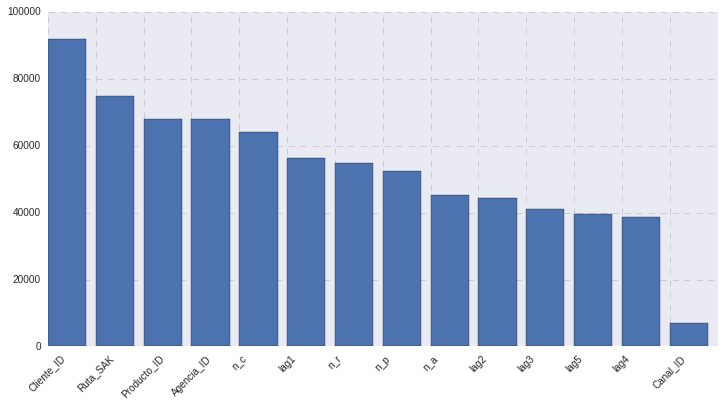

In [20]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(12, 6)
plt.bar(w['id'], w['count'], tick_label=w['name'])

plt.xticks(rotation=45)


In [16]:
# Save predictions to an SArray
# predictions = model.predict(train)

# Evaluate the model and save the results into a dictionary

# results = model.evaluate(train)
# print results


{'max_error': 5.325312852859497, 'rmse': 0.42764513831793416}


## predict

In [4]:
test = gl.SFrame.read_csv(path + 'test_lag5_w8.csv', verbose=False)
# test = test.join(town, on=['Agencia_ID','Producto_ID'], how='left')
# del test['Town']
# test = test.fillna('t_c',1)
# test = test.fillna('tcc',0)
# test = test.fillna('tp_sum',0)

In [7]:
test

id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,lag1,lag2,lag3
4721633,10,4037,1,1153,2398808,43202,0.0,0.0,1.60944
6035419,10,2239,1,1157,1529806,1230,1.09861,1.38629,0.0
3462602,10,1366,1,1051,1368806,1146,1.09861,0.693147,0.693147
855102,10,1911,1,1156,867160,1232,1.38629,0.0,0.0
3242700,11,1952,11,5721,1126647,47612,0.0,3.09104,2.99573
2421613,10,2653,1,2117,954439,35305,2.77259,3.04452,2.56495
1573296,10,1427,1,1102,4561415,43197,1.38629,1.79176,1.94591
1619375,10,1629,1,1013,169508,1146,2.07944,2.19722,1.79176
3539201,11,1120,1,1453,4602755,1230,0.0,1.38629,1.38629
1631781,10,1385,4,6617,20130,2025,2.56495,0.0,2.56495


In [6]:
del test['prior_sum']
del test['lag_sum']
del test['week_times']

In [51]:
'''Add feature to week 11'''
def feature_w11(test, lag_sum=0, prior_sum=0):
    test_full = test.copy()
    ids = test['id']
    del test['id']
    del test['Semana']
    demand_log = model.predict(test)
    sub1 = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})
    test_full = test_full.join(sub1,on=['id'],how='left')
    lag11 = test_full.groupby(key_columns=['Semana','Cliente_ID','Producto_ID'], operations={'lag11':agg.MEAN('Demanda_uni_equil')})
    lag11['Semana'] = lag11['Semana'].apply(lambda x: x+1)
    test_full = test_full.join(lag11,on=['Semana','Cliente_ID','Producto_ID'],how='left')
    test_full = test_full.fillna('lag11',0)
    test_full['lag1'] = test_full['lag1'] + test_full['lag11']
    
    if lag_sum == 1:
        test_full['lag_sum'] = test_full['lag_sum'] + test_full['lag11']
        
    if prior_sum == 1:
        lag_sum11 = test_full.groupby(key_columns=['Semana','Cliente_ID','Producto_ID'], operations={'lag_sum11':agg.SUM('Demanda_uni_equil')})
        lag_sum11['Semana'] = lag_sum11['Semana'].apply(lambda x: x+1)
        test_full = test_full.join(lag_sum11,on=['Semana','Cliente_ID','Producto_ID'],how='left')
        test_full = test_full.fillna('lag_sum11',0)
        test_full['prior_sum'] = test_full['prior_sum'] + test_full['lag_sum11']
        del test_full['lag_sum11']

    del test_full['lag11']
    del test_full['Demanda_uni_equil']
    return test_full

In [52]:
test_full = feature_w11(test, lag_sum=0, prior_sum=0)

ids = test_full['id']
del test_full['id']
del test_full['Semana']
demand_log = model.predict(test_full)
sub = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})

In [55]:
import math
sub['Demanda_uni_equil'] = sub['Demanda_uni_equil'].apply(lambda x: math.expm1(max(0, x)))

In [57]:
file_name = 'w8'+'_f'+str(model.num_features)+'_n'+str(model.max_iterations)+'_c'+str(model.column_subsample)
sub.save(path + file_name,format='csv')

In [56]:
sub

Demanda_uni_equil,id
3.44166957171,4721633
1.85704603627,6035419
1.66017810641,3462602
2.07406741465,855102
9.65243960287,3242700
12.1227423306,2421613
3.56680995819,1573296
6.66333331862,1619375
1.67583492502,3539201
8.6226952164,1631781
